In [52]:
# loand Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from pandas.plotting import scatter_matrix

In [20]:
# Load the dataset sierraleone-bumbuna)
df = pd.read_csv('data/sierraleone-bumbuna.csv')
print(df)

               Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb     RH   WS  WSgust  \
0       2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.1  0.0     0.0   
1       2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0     0.0   
2       2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0     0.0   
3       2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9   99.3  0.0     0.0   
4       2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.3  0.0     0.0   
...                  ...  ...  ...  ...   ...   ...   ...    ...  ...     ...   
525595  2022-10-29 23:56 -1.6 -0.1 -2.9   0.0   0.0  24.0  100.0  0.0     0.0   
525596  2022-10-29 23:57 -1.7 -0.1 -3.0   0.0   0.0  24.0  100.0  0.0     0.0   
525597  2022-10-29 23:58 -1.7 -0.1 -3.1   0.0   0.0  24.0  100.0  0.0     0.0   
525598  2022-10-29 23:59 -1.7 -0.2 -3.3   0.0   0.0  23.9  100.0  0.0     0.0   
525599  2022-10-30 00:00 -1.7 -0.1 -3.4   0.0   0.0  23.9  100.0  0.0     0.0   

        WSstdev   WD  WDstd

In [3]:
# Shape pf Datasets
df.shape

(525600, 19)

# The Statistical summary of the dataset

In [30]:
# Dispaly the concise summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB          525600 non-nul

In [4]:
# Filtering only columns with data types are numeric and computes statistics
df_stat = df.select_dtypes(include='number').describe().T
df_stat

count        mean         std    min    25%     50%     75%  \
GHI            525600.0  201.957515  298.495150  -19.5   -2.8     0.3   362.4   
DNI            525600.0  116.376337  218.652659   -7.8   -0.3    -0.1   107.0   
DHI            525600.0  113.720571  158.946032  -17.9   -3.8    -0.1   224.7   
ModA           525600.0  206.643095  300.896893    0.0    0.0     3.6   359.5   
ModB           525600.0  198.114691  288.889073    0.0    0.0     3.4   345.4   
Tamb           525600.0   26.319394    4.398605   12.3   23.1    25.3    29.4   
RH             525600.0   79.448857   20.520775    9.9   68.7    85.4    96.7   
WS             525600.0    1.146113    1.239248    0.0    0.0     0.8     2.0   
WSgust         525600.0    1.691606    1.617053    0.0    0.0     1.6     2.6   
WSstdev        525600.0    0.363823    0.295000    0.0    0.0     0.4     0.6   
WD             525600.0  133.044668  114.284792    0.0    0.0   161.5   234.1   
WDstdev        525600.0    7.172220    7.535093    0.0    0.0     6.2    12.0   
BP             525600.0  999.876469    2.104419  993.0  999.0  1000.0  1001.0   
Cleaning       525600.0    0.000967    0.031074    0.0    0.0     0.0     0.0   
Precipitation  525600.0    0.004806    0.047556    0.0    0.0     0.0     0.0   
TModA          525600.0   32.504263   12.434899   10.7   23.5    26.6    40.9   
TModB          525600.0   32.593091   12.009161   11.1   23.8    26.9    41.3   
Comments            0.0         NaN         NaN    NaN    NaN     NaN     NaN   

                  max  
GHI            1499.0  
DNI             946.0  
DHI             892.0  
ModA           1507.0  
ModB           1473.0  
Tamb             39.9  
RH              100.0  
WS               19.2  
WSgust           23.9  
WSstdev           4.1  
WD              360.0  
WDstdev          98.4  
BP             1006.0  
Cleaning          1.0  
Precipitation     2.4  
TModA            72.8  
TModB            70.4  
Comments          NaN

In [29]:
# checking for missing values
df.isna().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [5]:
# List of columns to check for negative values
df_columns = ['GHI', 'DNI', 'DHI']

# Find rows with negative values in any of these columns
negative_values = df[(df['GHI'] < 0) | (df['DNI'] < 0) | (df['DHI'] < 0)]
print(negative_values)

# Print results
if negative_values.empty:
    print("No negative values found in GHI, DNI, or DHI.")
else:
    print(f"Rows with negative values in GHI, DNI, or DHI:\n{negative_values}")

               Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb     RH   WS  WSgust  \
0       2021-10-30 00:01 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.1  0.0     0.0   
1       2021-10-30 00:02 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0     0.0   
2       2021-10-30 00:03 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.2  0.0     0.0   
3       2021-10-30 00:04 -0.7  0.0 -0.8   0.0   0.0  21.9   99.3  0.0     0.0   
4       2021-10-30 00:05 -0.7 -0.1 -0.8   0.0   0.0  21.9   99.3  0.0     0.0   
...                  ...  ...  ...  ...   ...   ...   ...    ...  ...     ...   
525595  2022-10-29 23:56 -1.6 -0.1 -2.9   0.0   0.0  24.0  100.0  0.0     0.0   
525596  2022-10-29 23:57 -1.7 -0.1 -3.0   0.0   0.0  24.0  100.0  0.0     0.0   
525597  2022-10-29 23:58 -1.7 -0.1 -3.1   0.0   0.0  24.0  100.0  0.0     0.0   
525598  2022-10-29 23:59 -1.7 -0.2 -3.3   0.0   0.0  23.9  100.0  0.0     0.0   
525599  2022-10-30 00:00 -1.7 -0.1 -3.4   0.0   0.0  23.9  100.0  0.0     0.0   

        WSstdev   WD  WDstd

In [6]:
for col in df_columns:
    count_negatives = (df[col] < 0).sum()
    print(f"Number of negative values in {col}: {count_negatives}")

Number of negative values in GHI: 261135
Number of negative values in DNI: 266352
Number of negative values in DHI: 263128


In [7]:
# replace Negative values with 'nan'
for col in df_columns:
    df.loc[df[col] < 0, col] = np.nan

In [8]:
# Fll those nan with the mean removing affects our analysis
for col in df_columns:
    df[col].fillna(df[col].mean())  # Replace NaN with mean

In [21]:
# Columns to check for outliers
columns = ['ModA', 'ModB', 'WS', 'WSgust']

# Calculate Z-scores for the specified columns
z_scores = df[columns].apply(zscore)

# Identify rows with outliers (Z-score > 3 or < -3)
outliers = df[(z_scores > 3).any(axis=1) | (z_scores < -3).any(axis=1)]

# Display rows with outliers
if not outliers.empty:
    print(f"Outliers detected in the following rows:\n{outliers}")
else:
    print("No significant outliers detected.")

Outliers detected in the following rows:
               Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
662     2021-10-30 11:03  1071.0  616.0  539.1  1142.0  1116.0  26.4  82.5   
663     2021-10-30 11:04  1119.0  673.5  538.4  1193.0  1167.0  26.3  83.1   
670     2021-10-30 11:11  1092.0  667.1  507.6  1163.0  1137.0  27.0  83.4   
671     2021-10-30 11:12  1154.0  755.7  491.3  1237.0  1208.0  27.0  82.4   
672     2021-10-30 11:13  1063.0  665.2  478.0  1132.0  1105.0  27.1  80.1   
...                  ...     ...    ...    ...     ...     ...   ...   ...   
522184  2022-10-27 15:05   167.2   -0.5  165.1   167.6   160.9  30.4  68.3   
522185  2022-10-27 15:06   163.4   -0.6  161.0   165.7   159.2  30.2  67.7   
522194  2022-10-27 15:15   183.5    0.3  181.6   173.7   168.7  29.3  70.2   
523792  2022-10-28 17:53    31.3   -0.5   30.2    34.3    32.3  28.4  79.5   
523794  2022-10-28 17:55    22.8   -0.8   21.4    26.5    25.0  27.9  80.4   

         WS  WSgust  W

In [22]:
# Remove outliers from the dataset
df2 = df[~((z_scores > 3).any(axis=1) | (z_scores < -3).any(axis=1))]

print(f"Data shape after removing outliers: {df2.shape}")

Data shape after removing outliers: (518970, 19)


In [23]:
def detect_outliers(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    return outliers

In [12]:
# Check for outliers in specific columns
check_for_outliers = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
outliers = detect_outliers(df2, check_for_outliers)
outliers

{'GHI': 0,
 'DNI': 0,
 'DHI': 423,
 'ModA': 21904,
 'ModB': 21441,
 'WS': 391,
 'WSgust': 0}

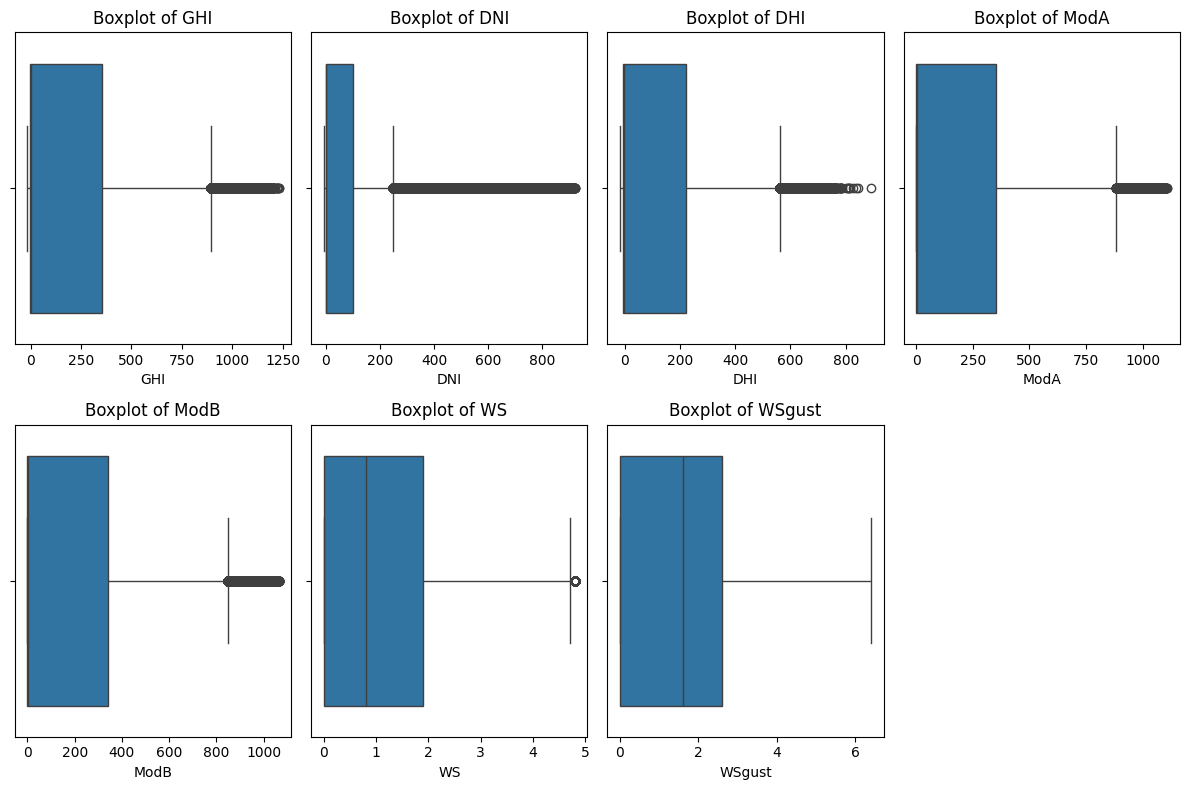

In [24]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(check_for_outliers, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=df2[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Time Series Analysis

In [33]:
# Convert to datetime
df2['Timestamp'] = pd.to_datetime(df2['Timestamp'], errors='coerce')

# Extract day, month, and year
df2['Day'] = df2['Timestamp'].dt.day
df2['Month'] = df2['Timestamp'].dt.month
df2['Year'] = df2['Timestamp'].dt.year


In [35]:
# Aggregate Data daily
# Daily mean
daily_df2 =df2.groupby('Day')[['GHI', 'DNI', 'DHI', 'Tamb']].mean().reset_index()

# Monthly mean
monthly_df2 = df2.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean().reset_index()

# Yearly mean
yearly_df2 = df2.groupby('Year')[['GHI', 'DNI', 'DHI', 'Tamb']].mean().reset_index()

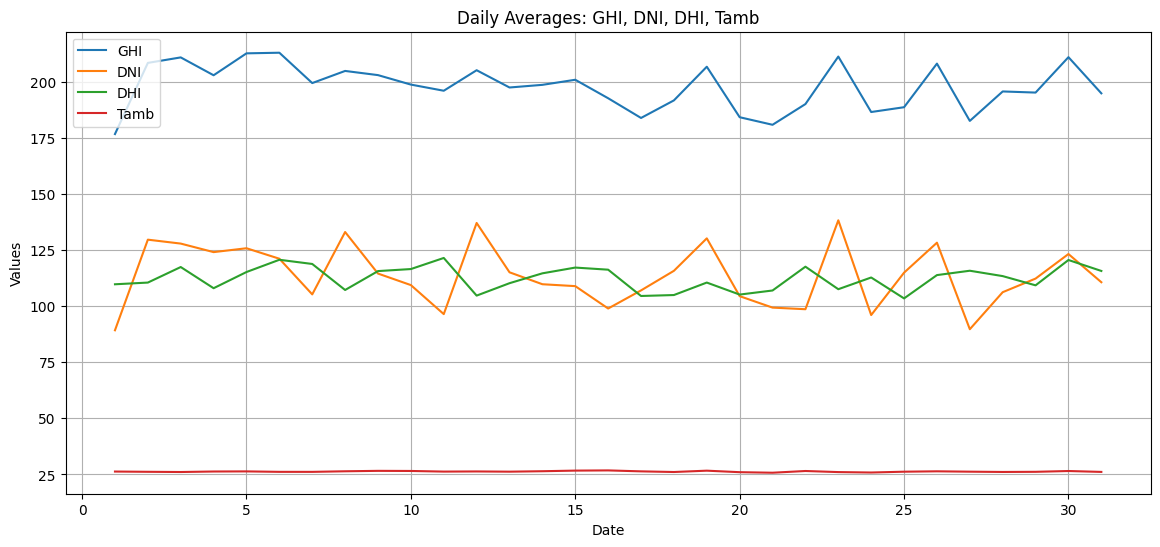

In [37]:
# Show their daily status 
plt.figure(figsize=(14, 6))
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.plot(daily_df2['Day'], daily_df2[col], label=col)
plt.title('Daily Averages: GHI, DNI, DHI, Tamb')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

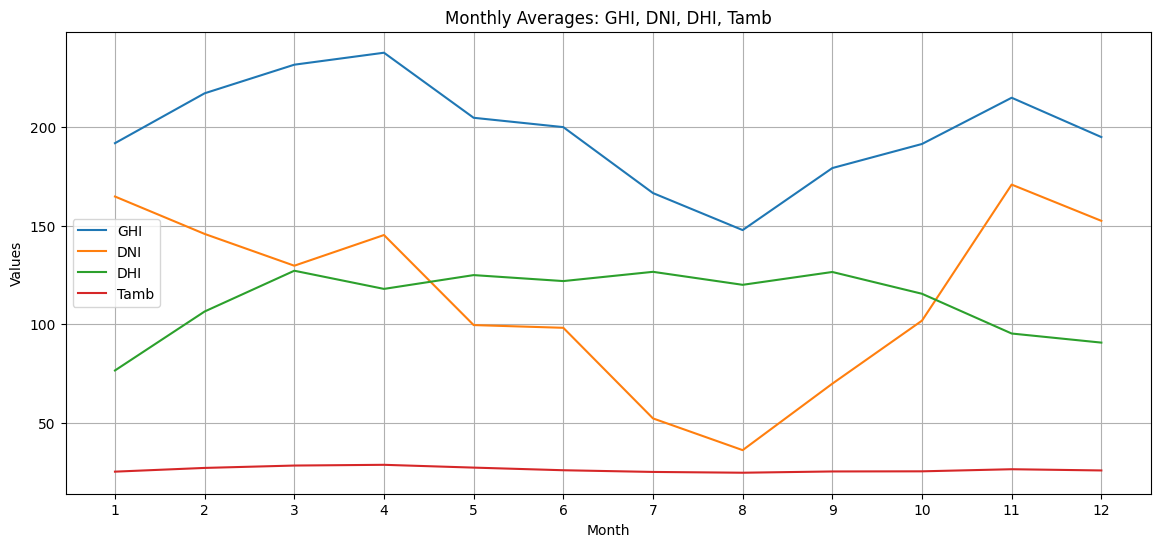

In [38]:
# Show their monthly status 
plt.figure(figsize=(14, 6))
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.plot(monthly_df2['Month'].astype(str), monthly_df2[col], label=col)
plt.title('Monthly Averages: GHI, DNI, DHI, Tamb')
plt.xlabel('Month')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

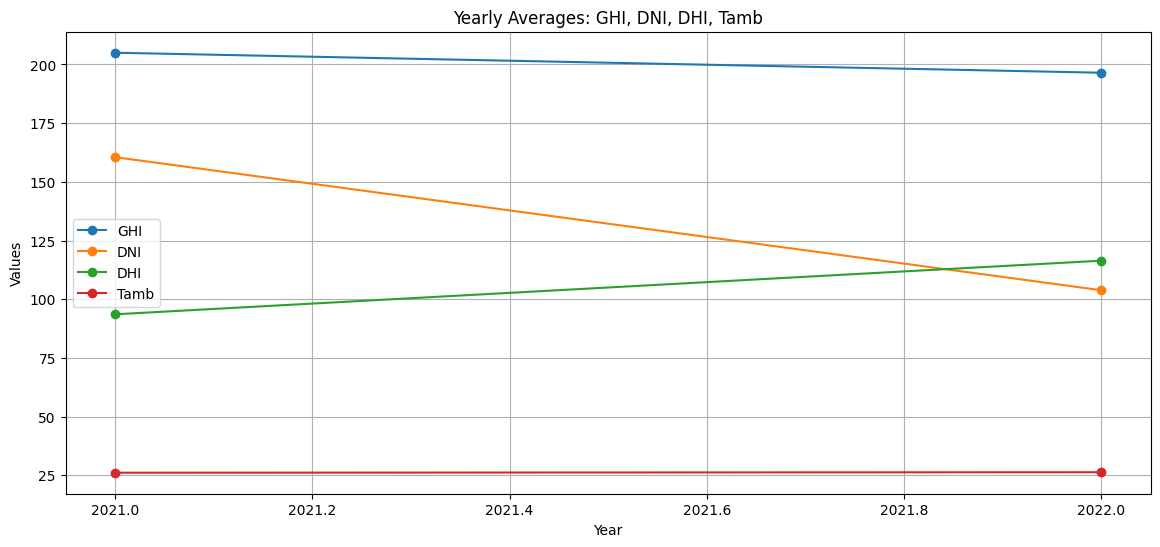

In [39]:
# Show their yearly status 
plt.figure(figsize=(14, 6))
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.plot(yearly_df2['Year'], yearly_df2[col], marker='o', label=col)
plt.title('Yearly Averages: GHI, DNI, DHI, Tamb')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

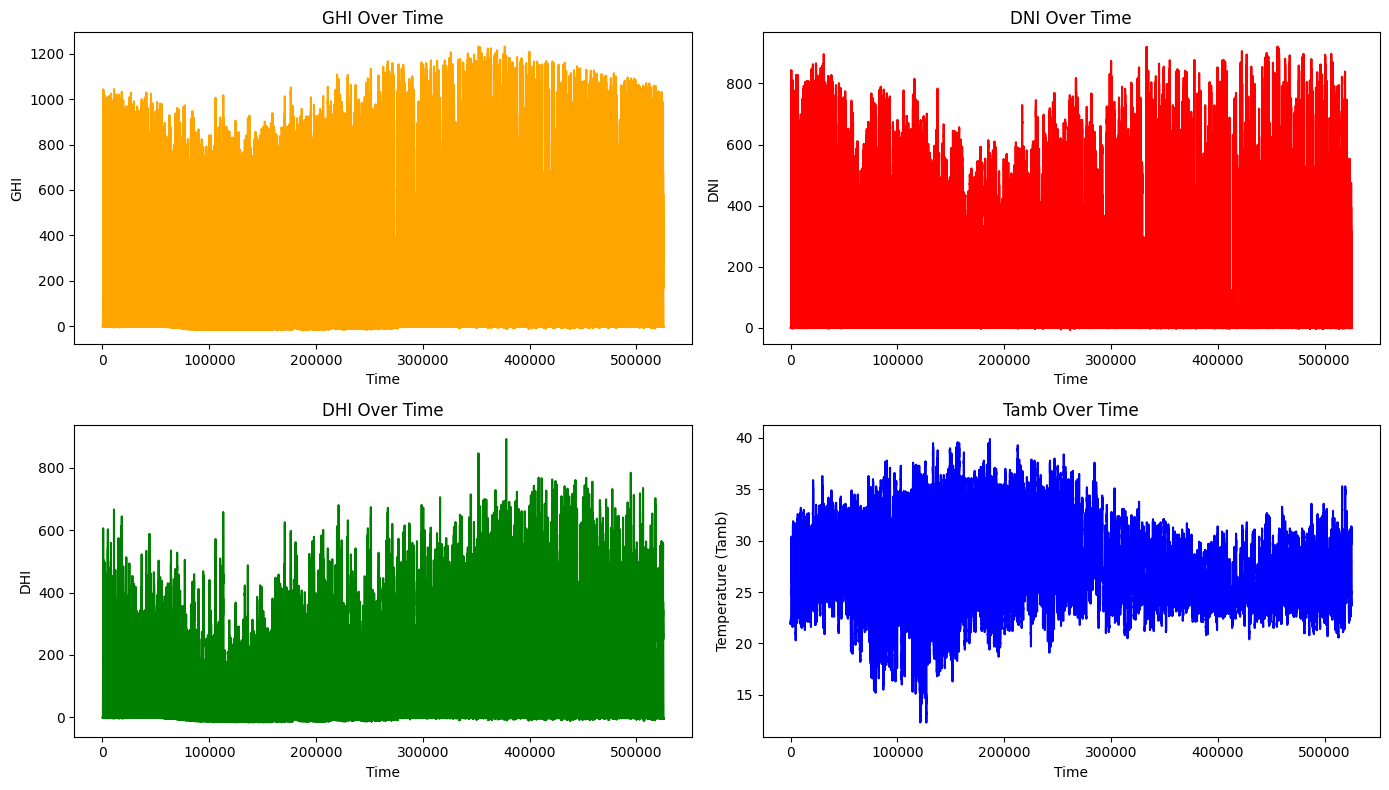

In [49]:
plt.figure(figsize=(14, 8))

# GHI
plt.subplot(2, 2, 1)
plt.plot(df2.index, df2['GHI'], label='GHI', color='orange')
plt.title('GHI Over Time')
plt.xlabel('Time')
plt.ylabel('GHI')
# DNI
plt.subplot(2, 2, 2)
plt.plot(df2.index, df2['DNI'], label='DNI', color='red')
plt.title('DNI Over Time')
plt.xlabel('Time')
plt.ylabel('DNI')

# DHI
plt.subplot(2, 2, 3)
plt.plot(df2.index, df2['DHI'], label='DHI', color='green')
plt.title('DHI Over Time')
plt.xlabel('Time')
plt.ylabel('DHI')

# Tamb
plt.subplot(2, 2, 4)
plt.plot(df2.index, df2['Tamb'], label='Tamb', color='blue')
plt.title('Tamb Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature (Tamb)')

plt.tight_layout()
plt.show()

In [40]:
# Calculate mean ModA and ModB values before and after cleaning
cleaned = df[df['Cleaning'] == 1]
not_cleaned = df2[df2['Cleaning'] == 0]

print("Mean ModA when cleaned:", cleaned['ModA'].mean())
print("Mean ModA when not cleaned:", not_cleaned['ModA'].mean())


Mean ModA when cleaned: 273.30925196850393
Mean ModA when not cleaned: 202.5410720554256


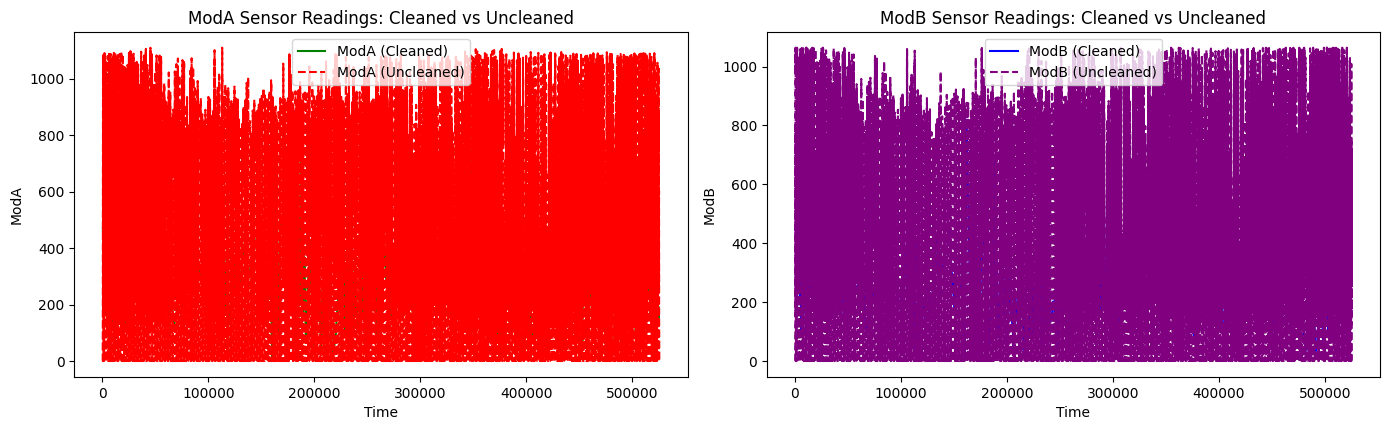

In [41]:
plt.figure(figsize=(14, 8))

# ModA Comparison
plt.subplot(2, 2, 1)
plt.plot(cleaned.index, cleaned['ModA'], label='ModA (Cleaned)', color='green')
plt.plot(not_cleaned.index, not_cleaned['ModA'], label='ModA (Uncleaned)', color='red', linestyle='dashed')
plt.title('ModA Sensor Readings: Cleaned vs Uncleaned')
plt.xlabel('Time')
plt.ylabel('ModA')
plt.legend()

# ModB Comparison
plt.subplot(2, 2, 2)
plt.plot(cleaned.index, cleaned['ModB'], label='ModB (Cleaned)', color='blue')
plt.plot(not_cleaned.index, not_cleaned['ModB'], label='ModB (Uncleaned)', color='purple', linestyle='dashed')
plt.title('ModB Sensor Readings: Cleaned vs Uncleaned')
plt.xlabel('Time')
plt.ylabel('ModB')
plt.legend()

plt.tight_layout()
plt.show()

# Correlation Analysis

In [44]:
# Select relevant columns (GHI, DNI, DHI, TModA, TModB, WS, WSgust, WD)
corre = df2[['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'WS', 'WSgust', 'WD']]

# Compute the correlation matrix
corr_matrix = corre.corr()
corr_matrix

GHI       DNI       DHI     TModA     TModB        WS    WSgust  \
GHI     1.000000  0.864187  0.865777  0.925182  0.914348  0.402642  0.447951   
DNI     0.864187  1.000000  0.527926  0.814124  0.806081  0.335561  0.369923   
DHI     0.865777  0.527926  1.000000  0.807463  0.806454  0.376230  0.419799   
TModA   0.925182  0.814124  0.807463  1.000000  0.993209  0.467188  0.510404   
TModB   0.914348  0.806081  0.806454  0.993209  1.000000  0.488664  0.529107   
WS      0.402642  0.335561  0.376230  0.467188  0.488664  1.000000  0.971222   
WSgust  0.447951  0.369923  0.419799  0.510404  0.529107  0.971222  1.000000   
WD      0.407895  0.317060  0.405280  0.462348  0.485147  0.606252  0.674785   

              WD  
GHI     0.407895  
DNI     0.317060  
DHI     0.405280  
TModA   0.462348  
TModB   0.485147  
WS      0.606252  
WSgust  0.674785  
WD      1.000000

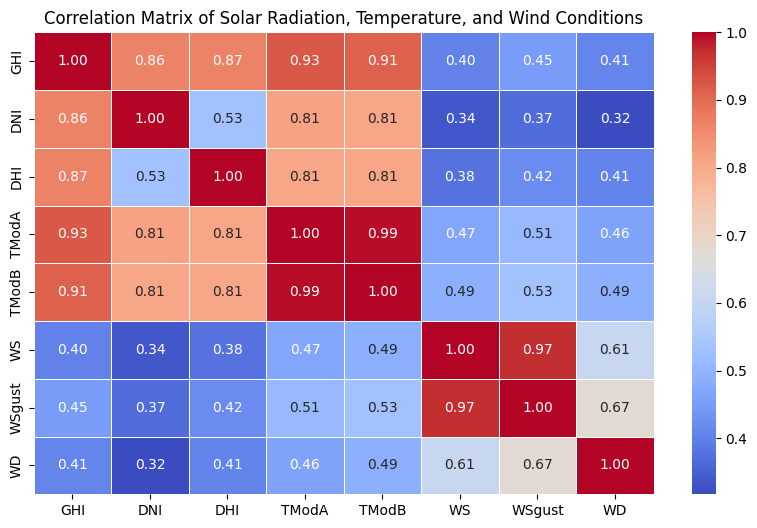

In [45]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Solar Radiation, Temperature, and Wind Conditions')
plt.show()

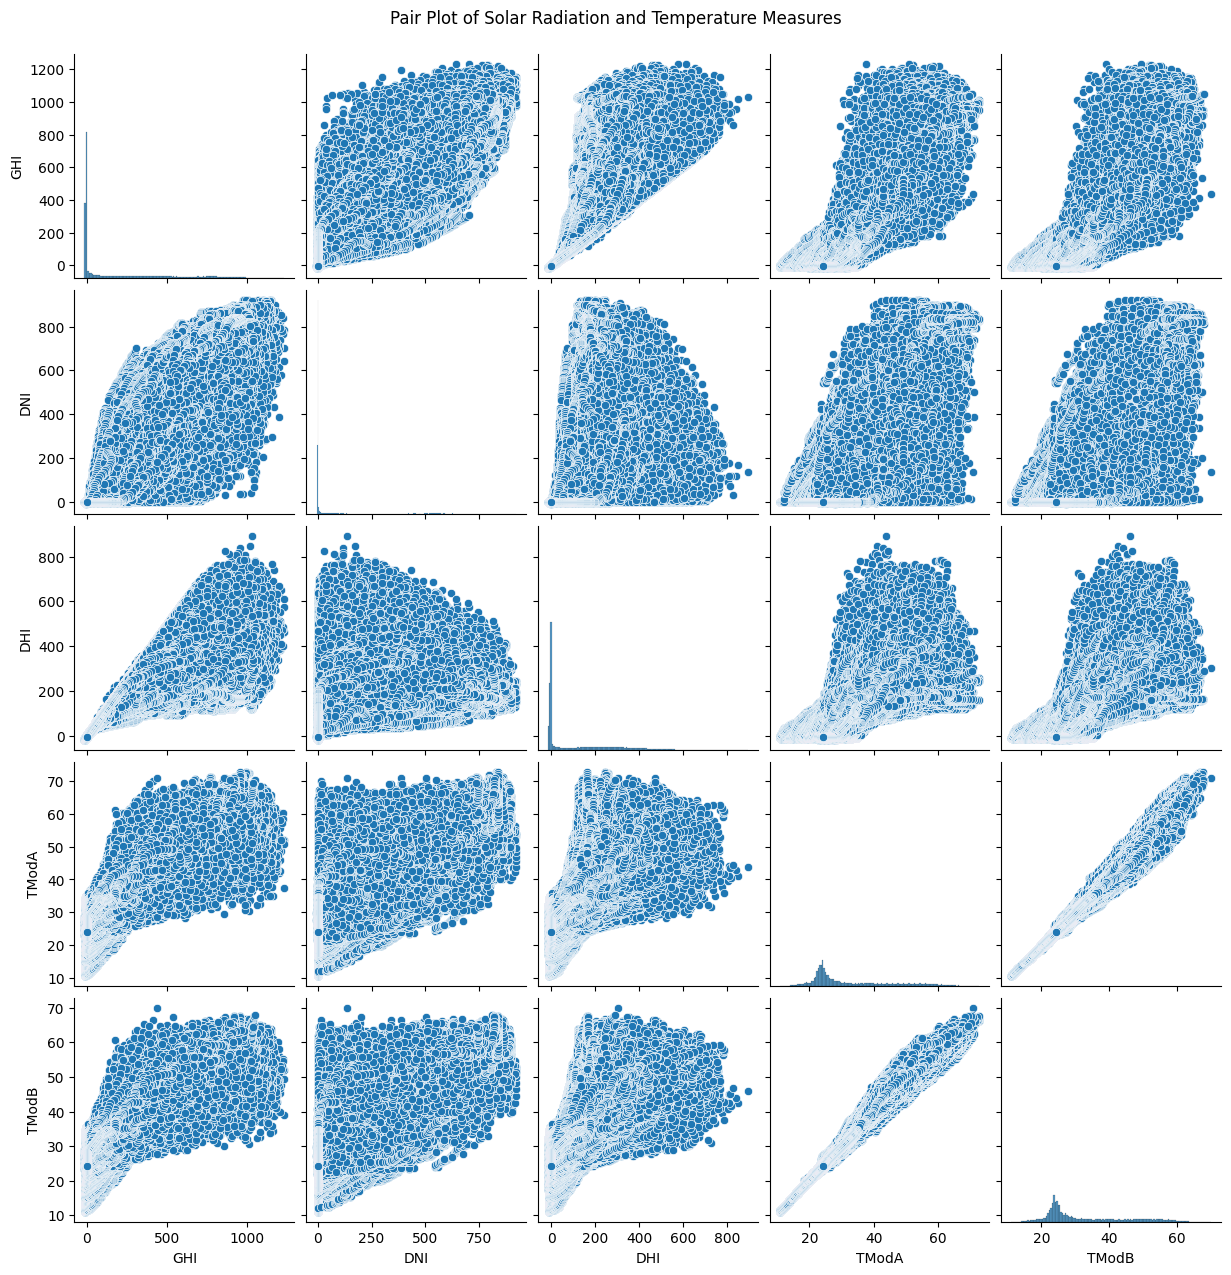

In [46]:
# Plotting pair plot for solar radiation components (GHI, DNI, DHI) and temperature (TModA, TModB)
sns.pairplot(corre[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']])
plt.suptitle('Pair Plot of Solar Radiation and Temperature Measures', y=1.02)
plt.show()

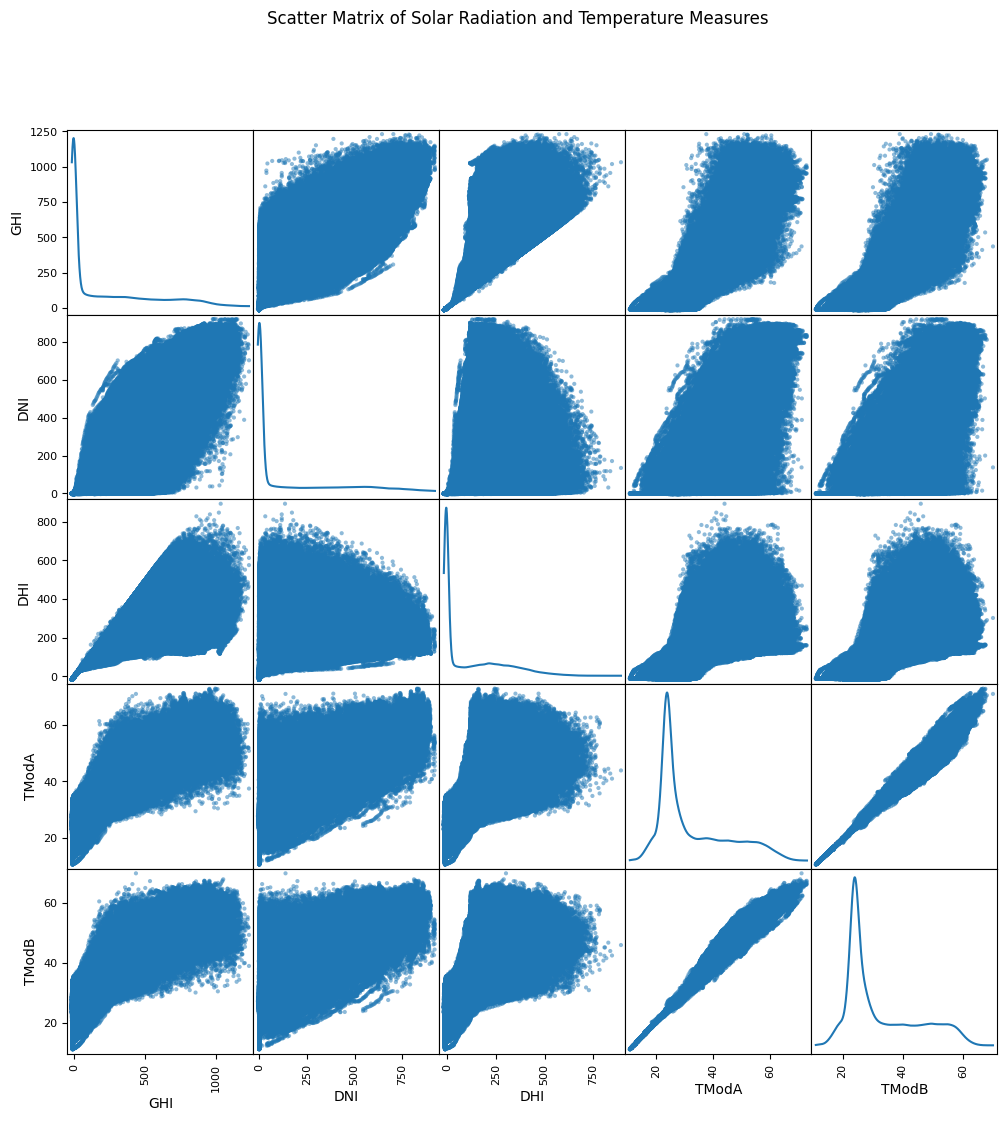

In [48]:
# Creating scatter matrix for solar irradiance (GHI, DNI, DHI) and temperature (TModA, TModB)
scatter_matrix(corre[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']], figsize=(12, 12), diagonal='kde')
plt.suptitle('Scatter Matrix of Solar Radiation and Temperature Measures')
plt.show()

# Wind Analysis

In [53]:
pip install windrose

  Using cached windrose-1.9.2-py3-none-any.whl.metadata (5.2 kB)
Using cached windrose-1.9.2-py3-none-any.whl (20 kB)
Note: you may need to restart the kernel to use updated packages.


# Wind Analysis: Use radial bar plots or wind roses Identify trends and significant wind events by showing the distribution of wind speed and direction, along with how variable the wind direction tends to be

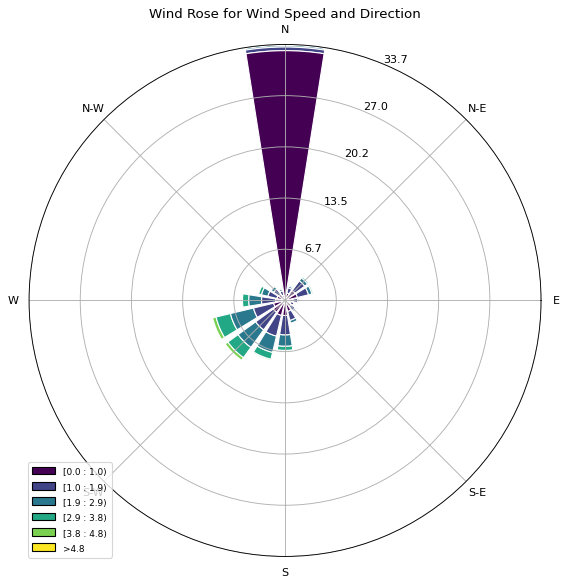

In [54]:
# Radial bar plot for wind direction
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(df2['WD'], df2['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title('Wind Rose for Wind Speed and Direction')
plt.show()

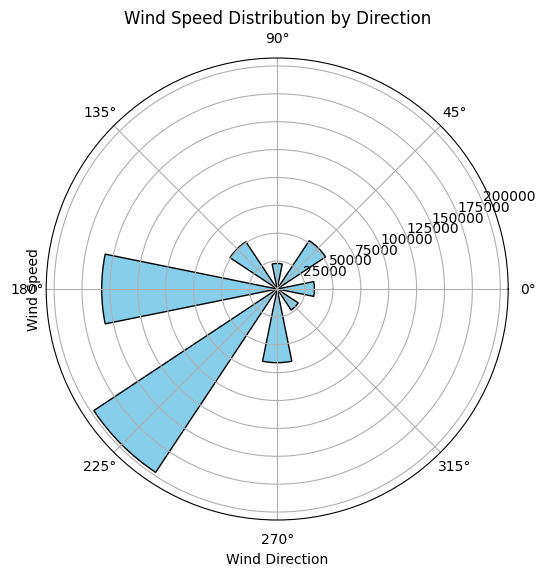

In [55]:
wind_speed = df['WS']
wind_direction = df['WD']

# Preprocess wind direction if it's not in radians
wind_direction_rad = np.radians(wind_direction)

# Create a radial bar plot (histogram) for wind speed by direction
num_bins = 8
wind_directions = np.linspace(0, 2 * np.pi, num_bins + 1)

# Compute histogram data
wind_speed_hist, _ = np.histogram(wind_direction_rad, bins=wind_directions, weights=wind_speed)

# Set up the radial bar plot
angles = wind_directions[:-1]  # Drop the last bin edge, it is the same as the first one
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 6))

# Create the radial bars
bars = ax.bar(angles, wind_speed_hist, width=0.4, color='skyblue', edgecolor='black')

# Set labels and title
ax.set_title('Wind Speed Distribution by Direction')
ax.set_xlabel('Wind Direction')
ax.set_ylabel('Wind Speed')

# Display the plot
plt.show()

# Temperature Analysis


C:\Users\Specter\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


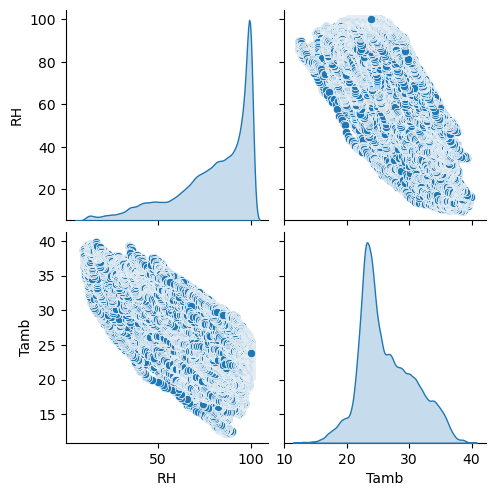

In [ ]:
sns.pairplot(df2, vars=['RH', 'Tamb'], diag_kind='kde')
plt.show()

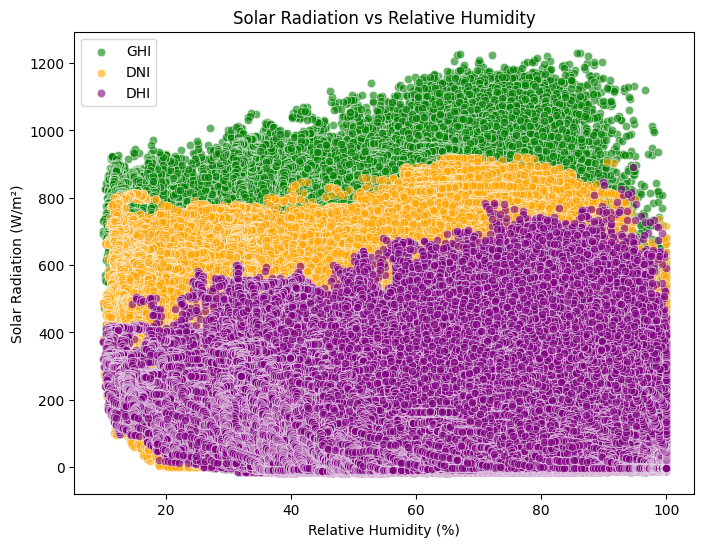

In [56]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df2['RH'], y=df2['GHI'], color='green', label='GHI', alpha=0.6)
sns.scatterplot(x=df2['RH'], y=df2['DNI'], color='orange', label='DNI', alpha=0.6)
sns.scatterplot(x=df2['RH'], y=df2['DHI'], color='purple', label='DHI', alpha=0.6)
plt.title('Solar Radiation vs Relative Humidity')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Solar Radiation (W/m²)')
plt.legend()
plt.show()

# Histograms

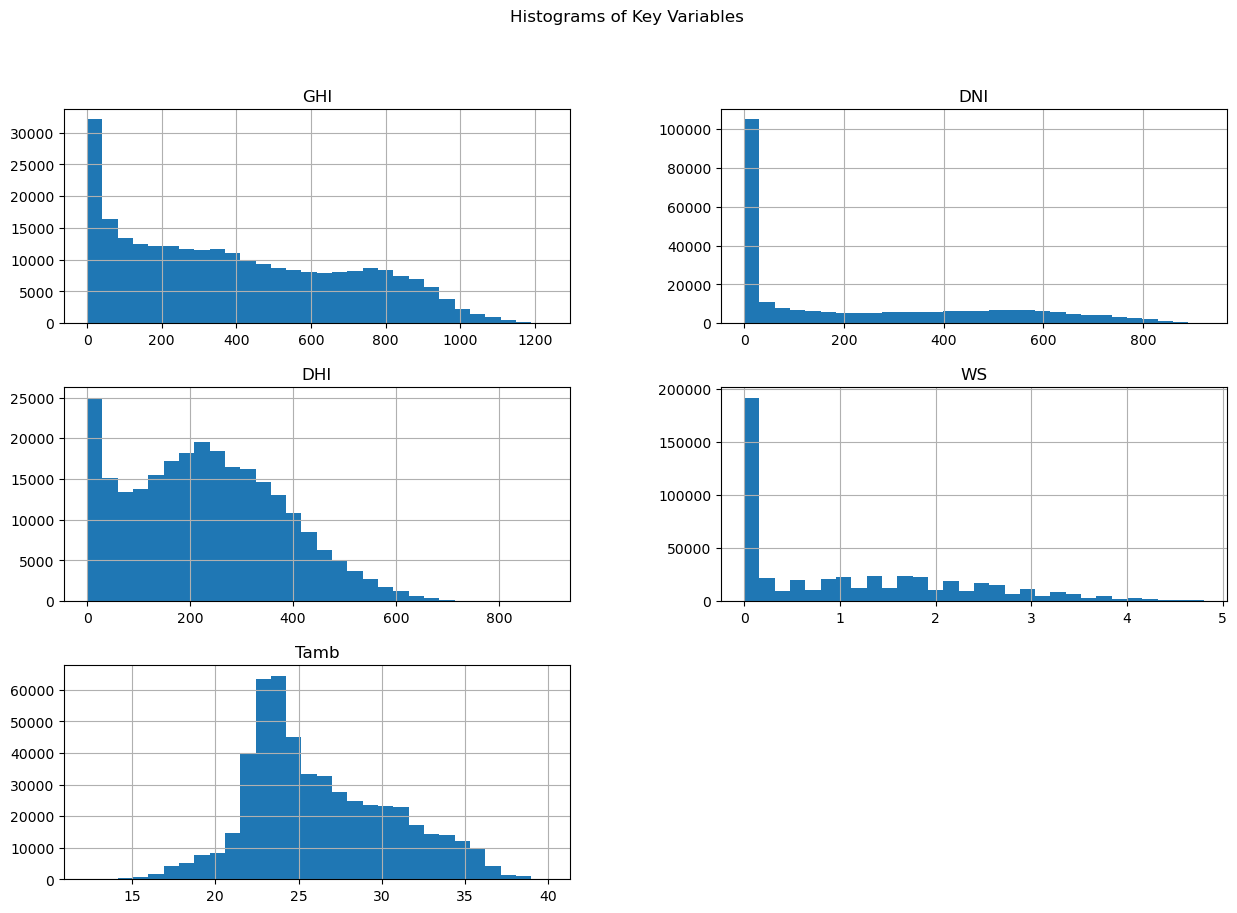

In [ ]:
# Plot histograms for key variables
variables = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb']
df2[variables].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Key Variables')
plt.show()

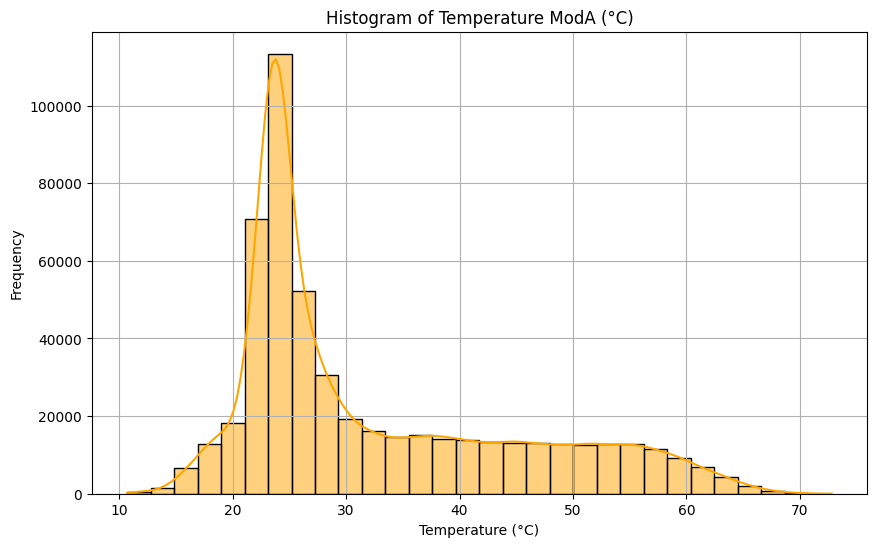

In [57]:
plt.figure(figsize=(10, 6))
sns.histplot(df['TModA'], kde=True, color='orange', bins=30)
plt.title('Histogram of Temperature ModA (°C)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

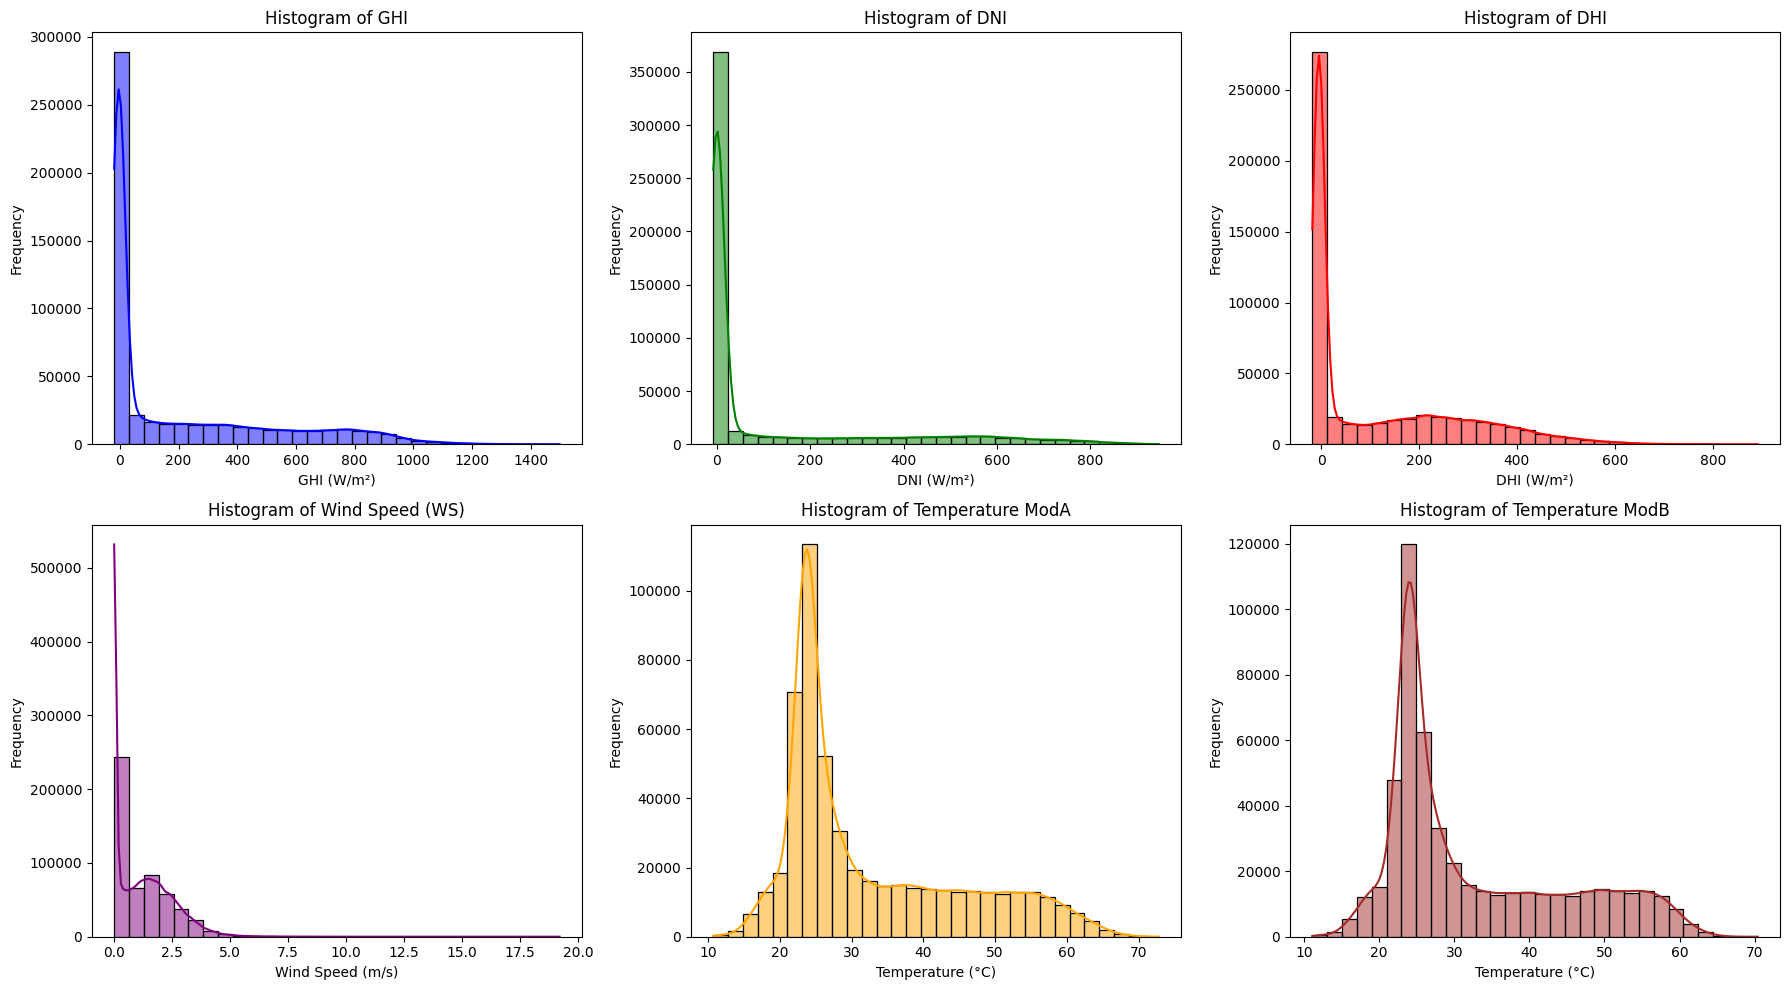

In [58]:
# Create a 2x3 grid for subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# GHI Histogram
sns.histplot(df['GHI'], kde=True, color='blue', bins=30, ax=axes[0, 0])
axes[0, 0].set_title('Histogram of GHI')
axes[0, 0].set_xlabel('GHI (W/m²)')
axes[0, 0].set_ylabel('Frequency')

# TModA Histogram
sns.histplot(df['TModA'], kde=True, color='orange', bins=30, ax=axes[1, 1])
axes[1, 1].set_title('Histogram of Temperature ModA')
axes[1, 1].set_xlabel('Temperature (°C)')
axes[1, 1].set_ylabel('Frequency')

# DNI Histogram
sns.histplot(df['DNI'], kde=True, color='green', bins=30, ax=axes[0, 1])
axes[0, 1].set_title('Histogram of DNI')
axes[0, 1].set_xlabel('DNI (W/m²)')
axes[0, 1].set_ylabel('Frequency')

# DHI Histogram
sns.histplot(df['DHI'], kde=True, color='red', bins=30, ax=axes[0, 2])
axes[0, 2].set_title('Histogram of DHI')
axes[0, 2].set_xlabel('DHI (W/m²)')
axes[0, 2].set_ylabel('Frequency')

# WS Histogram
sns.histplot(df['WS'], kde=True, color='purple', bins=30, ax=axes[1, 0])
axes[1, 0].set_title('Histogram of Wind Speed (WS)')
axes[1, 0].set_xlabel('Wind Speed (m/s)')
axes[1, 0].set_ylabel('Frequency')

# TModB Histogram
sns.histplot(df['TModB'], kde=True, color='brown', bins=30, ax=axes[1, 2])
axes[1, 2].set_title('Histogram of Temperature ModB')
axes[1, 2].set_xlabel('Temperature (°C)')
axes[1, 2].set_ylabel('Frequency')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Bubble Charts

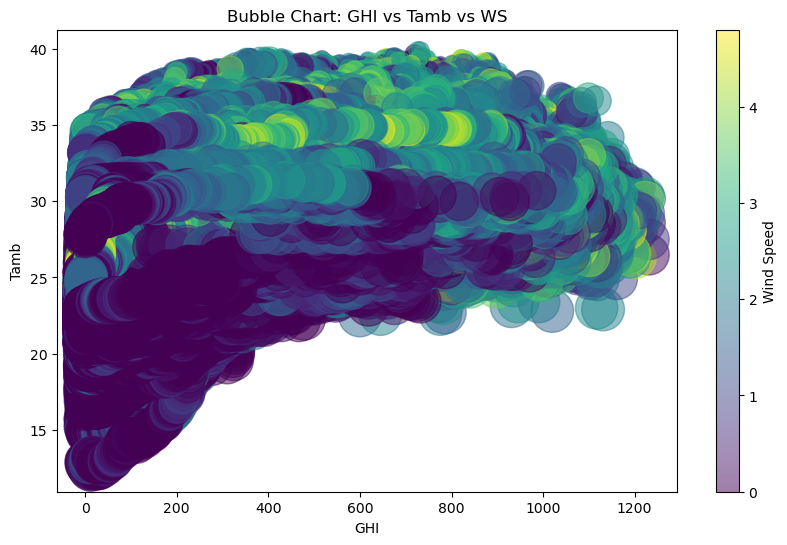

In [ ]:
# Bubble chart: GHI vs Tamb vs WS with bubble size as RH
plt.figure(figsize=(10, 6))
bubble_chart = plt.scatter(df2['GHI'], df2['Tamb'], s=df2['RH']*10, c=df2['WS'], alpha=0.5, cmap='viridis')
plt.colorbar(bubble_chart, label='Wind Speed')
plt.title('Bubble Chart: GHI vs Tamb vs WS')
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.show()